In [2]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import random_split, DataLoader
from torchvision import transforms

In [3]:
import os, sys
sys.path.append(os.path.abspath('..'))

from src.metrics_acdc import load_nii
from src.data.cine2gridtag import sim_gridtag, mod_contrast

from src.data.utils import Patient
from src.data.datasets import ACDCDataset

In [4]:
acdc_filepath = Path('../../training')

example = acdc_filepath / 'patient002' / 'patient002_frame01.nii.gz'
example_gt = acdc_filepath / 'patient001' / 'patient001_frame01_gt.nii.gz'

In [4]:
imt, _, _ = load_nii(example)
gt, _, _ = load_nii(example_gt)

In [5]:
# mask = gt[:, :, 0]
# mask = mask.astype(np.float64)

# tt = transforms.ToTensor()
# rs = transforms.Resize((256, 256), interpolation=transforms.InterpolationMode.NEAREST)

# mask = rs(tt(mask)).unique().numpy()

In [6]:
# fig, ax = plt.subplots(10, 3, figsize=(15, 30))

# for i in range(10):
#     ax[i, 0].imshow(imt[:, :, i], cmap='gray')
#     ax[i, 1].imshow(gt[:, :, i])
#     ax[i, 2].imshow(sim_gridtag(imt[:, :, i] ** 0.4, 5), cmap='gray')

In [7]:
# p = Patient(acdc_filepath / 'patient001')

In [6]:
dataset = ACDCDataset(acdc_filepath, tagged=True, recompute=True, verbose=1)

Processing patient002...: 100%|██████████| 100/100 [01:41<00:00,  1.01s/it]


Skipped 0 image(s) due to incoherent label
Skipped 0 image(s) due to presence of NaN
Saved dataset of 951 images to /workspace/dev/tagroi/checkpoints/acdc_dataset_tagged.pt


In [14]:
image, mask = dataset[0]

In [15]:
image.isnan().sum(), mask.isnan().sum()

(tensor(0), tensor(0))

In [12]:
set(label.unique().numpy()).issubset(set([0, 1, 2, 3]))

False

In [ ]:
not all([_class in [0., 1., 2., 3.] for _class in label.unique()])

True

In [20]:
means, stds = zip(*[(img[0][0].mean().item(), img[0][0].std().item()) for img in dataset])

(array([  8.,  16.,  51.,  73.,  74., 124., 257., 199., 114.,  35.]),
 array([-1.53037353, -1.40074   , -1.27110647, -1.14147293, -1.0118394 ,
        -0.88220587, -0.75257233, -0.6229388 , -0.49330527, -0.36367173,
        -0.2340382 ]),
 <BarContainer object of 10 artists>)

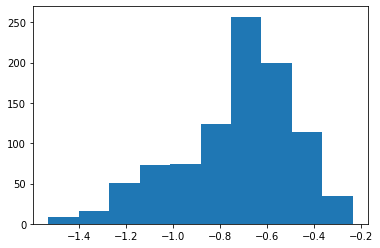

In [23]:
plt.hist(means[1:])

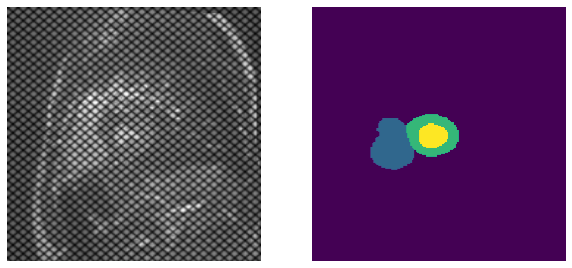

In [12]:
fix, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(dataset[212][0][0, ...], cmap='gray'), ax[0].axis('off')
ax[1].imshow(dataset[212][1][...]), ax[1].axis('off')

plt.show()